In [1]:
# imports
import cv2
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

cwd = os.getcwd()


CK+ Dataset

0: anger
1: disgust
2: fear
3: happy
4: sad
5: surprise
6: neutral
7: contempt

   emotion                                             pixels     Usage
0        6  36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...  Training
1        6  88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...  Training
2        6  9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...  Training
3        6  104 106 108 104 95 50 60 61 58 83 126 133 139 ...  Training
4        6  68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...  Training
test
6
img shape:  2304
size: 48 x 48


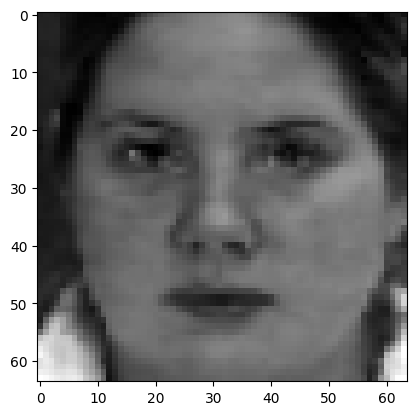

img is gray scale:  True


In [2]:
# https://www.kaggle.com/datasets/davilsena/ckdataset

# load in datasets
# load in the ckextneded.csv file
ckplus_dataset = pd.read_csv(cwd + '/datasets/ckextended.csv')
print(ckplus_dataset.head())
print("test")
print(ckplus_dataset.iloc[0, 0])

# display the first image in the dataset by getting the data in the first row of the second column
# and reshaping it to 48x48
img = ckplus_dataset.iloc[0, 1]
img = img.split(' ')
img = np.array(img, dtype='float32')
print("img shape: ", img.shape[0])
size = int(np.sqrt(img.shape[0]))
print(f"size: {size} x {size}")
img = img.reshape((size, size))
# upscale image to 64x64
img = cv2.resize(img, (64, 64))
plt.imshow(img, cmap='gray')
plt.show()

# check if img is grey scale
print("img is gray scale: ", img.ndim == 2)

# if ckplus_dataset row in the 3rd column is training, then the image is for training, else it is for testing
# create a list of training and testing images
ckplus_train_images = []
ckplus_train_labels = []
ckplus_test_images = []
ckplus_test_labels = []

for i in range(0, ckplus_dataset.shape[0]):
    img = ckplus_dataset.iloc[i, 1]
    img = img.split(' ')
    img = np.array(img, dtype='float32')
    size = int(np.sqrt(img.shape[0]))
    img = img.reshape((size, size))
    img = cv2.resize(img, (64, 64))
    if ckplus_dataset.iloc[i, 2] == 'Training':
        ckplus_train_images.append(img)
        ckplus_train_labels.append(ckplus_dataset.iloc[i, 0])
    else:
        ckplus_test_images.append(img)
        ckplus_test_labels.append(ckplus_dataset.iloc[i, 0])


# Unable to use Dataset
Not able to use the JAFFE dataset due to restrictions on the dataset. Including the restriction of not being able to be used for homework, undergraduate projects and course projects. Unless there is another way to access it but I wasn't able to find any other way to access it.
https://zenodo.org/records/3451524

# Datasets used
https://www.kaggle.com/datasets/tapakah68/facial-emotion-recognition

In [32]:
def crop_using_viola_johns_algorithm(img, classifier = 'haarcascade_frontalface_default.xml'):
    # load in the haar cascade classifier
    face_cascade = cv2.CascadeClassifier(cwd +'/' +classifier)

    # convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # detect the faces in the image
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    # draw a rectangle around the face
    for (x, y, w, h) in faces:
        # crop the image
        img = img[y:y+h, x:x+w]
        # resize the image to 48x48
        img = cv2.resize(img, (64, 64))
        # return the image
        return img
    
# croped_image = crop_using_viola_johns_algorithm(cv2.imread(cwd + '/datasets/kaggle-facial-emotional-recognition-dataset/images/0/Anger.jpg'))
# test the function
# cv2.imwrite(cwd + '/datasets/kaggle-facial-emotional-recognition-dataset/images/0/Anger_cropped.jpg', croped_image.astype(np.uint8))


In [33]:
#load YOLOv3 weights and config file
net = cv2.dnn.readNet(cwd + '/yolov3.weights', cwd + '/yolov3.cfg')

with open(cwd + '/coco.names', 'r') as f:
    classes = f.read().strip().split('\n')
def alternative_face_detector(img):
    blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    layerOutputs = net.forward()
    layer_names = net.getUnconnectedOutLayersNames()
    detections = net.forward(layer_names)

    for detection in detections:
        for obj in detection:
            scores = obj[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]
            if confidence > 0.5 and classes[classID] == "person":
                return True
    return False



In [38]:
# https://www.kaggle.com/datasets/tapakah68/facial-emotion-recognition

# crop images if they arent' already cropped

classifiers = ['haarcascade_frontalface_default.xml', 'haarcascade_frontalface_alt.xml', 'haarcascade_frontalface_alt2.xml', 'haarcascade_frontalface_alt_tree.xml','haarcascade_profileface.xml']

# go through the folders in the dataset/kaggle-facial-emotional-recognition-dataset 
for folder in os.listdir(cwd + '/datasets/kaggle-facial-emotional-recognition-dataset/images'):
    for img_name in os.listdir(cwd + '/datasets/kaggle-facial-emotional-recognition-dataset/images/' + folder):
        img = cv2.imread(cwd + '/datasets/kaggle-facial-emotional-recognition-dataset/images/' + folder + '/' + img_name)
        cropped_image = crop_using_viola_johns_algorithm(img)
        if cropped_image is None:
            print("img is none")
            break
        if cropped_image is None:
            print("img is none")
            break
        if alternative_face_detector(cropped_image) == False:
            for classifier in classifiers:
                cropped_image = crop_using_viola_johns_algorithm(img, classifier)
                if cropped_image is None:
                    break
                if alternative_face_detector(cropped_image) == True:
                    break
            
        if cropped_image is None:
            print("img is none")
            break
        

        # save the image
        # if folder doesn't exist, create it
        if not os.path.exists(cwd + '/datasets/kaggle-facial-emotional-recognition-dataset/cropped_images'):
            os.makedirs(cwd + '/datasets/kaggle-facial-emotional-recognition-dataset/cropped_images')
        if not os.path.exists(cwd + '/datasets/kaggle-facial-emotional-recognition-dataset/cropped_images/' + folder):
            os.makedirs(cwd + '/datasets/kaggle-facial-emotional-recognition-dataset/cropped_images/' + folder)
        

                # convert the image to grayscale
        
        cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(cwd + '/datasets/kaggle-facial-emotional-recognition-dataset/cropped_images/' + folder + '/' + img_name, cropped_image)
    # go through the images in the folder
    

   


img is none
img is none
img is none
img is none
img is none


In [49]:
def get_number_label_for_string(label):
    if label == 'Anger':
        return 0
    elif label == 'Disgust':
        return 1
    elif label == 'Fear':
        return 2
    elif label == 'Happy':
        return 3
    elif label == 'Sad':
        return 4
    elif label == 'Surprised':
        return 5
    elif label == 'Neutral':
        return 6
    elif label == 'Contempt':
        return 7
    else:
        return -1

In [51]:
# load in the cropped images
# create a list of training and testing images

kaggle_images = []
kaggle_labels = []

for folder in os.listdir(cwd + '/datasets/kaggle-facial-emotional-recognition-dataset/cropped_images'):
    for img_name in os.listdir(cwd + '/datasets/kaggle-facial-emotional-recognition-dataset/cropped_images/' + folder):
        img = cv2.imread(cwd + '/datasets/kaggle-facial-emotional-recognition-dataset/cropped_images/' + folder + '/' + img_name)
        if img is None:
            print("img is none")
            break
        kaggle_images.append(img)
        # print(img_name)
        # print(img_name.split('.')[0])
        kaggle_labels.append(get_number_label_for_string(img_name.split('.')[0]))
        
print("kaggle images: ", len(kaggle_images))
print("kaggle labels: ", len(kaggle_labels))


        

kaggle images:  125
kaggle labels:  125
kaggle_labels:  [0, 7, 1, 4, 5, 2, 6, 3, 0, 7, 1, 4, 0, 7, 1, 4, 5, 2, 6, 3, 0, 7, 1, 0, 7, 1, 4, 5, 2, 6, 3, 0, 7, 1, 4, 5, 2, 6, 3, 0, 7, 1, 4, 5, 2, 6, 3, 0, 7, 1, 4, 5, 2, 6, 3, 0, 7, 1, 4, 5, 2, 6, 3, 0, 7, 0, 7, 1, 4, 5, 2, 6, 3, 0, 7, 1, 4, 5, 2, 6, 3, 0, 7, 1, 4, 5, 2, 6, 3, 0, 7, 1, 4, 5, 2, 6, 3, 0, 7, 1, 4, 5, 2, 6, 3, 0, 7, 1, 4, 5, 2, 6, 3, 0, 7, 1, 4, 0, 7, 1, 4, 5, 2, 6, 3]
kaggle_labels:  0


In [ ]:
def generate_hog_features(image):
    # convert to grayscale 
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # calc hog features using cv2.HOGDescriptor
    hog = cv2.HOGDescriptor()
    hog_features = hog.compute(gray)

    return hog_features